In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

## 数式処理で方程式の解を求める

In [16]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
# sp.init_printing()  # 本来はjupyter上での可視化で必要らしいが，ハングアウトするので不要

In [3]:
s = sym.Symbol('s')
e1 = 2 * s**2 + 5 * s + 3
e2 = s**3 + s**2 + s + 1

p1 = sym.solve(e1, s)
p2 = sym.solve(e2, s)

print('The answer to the equation:', e1, 'is', p1)
print('The answer to the equation:', e2, 'is', p2)

The answer to the equation: 2*s**2 + 5*s + 3 is [-3/2, -1]
The answer to the equation: s**3 + s**2 + s + 1 is [-1, -I, I]


#### sympyおまけ

In [4]:
e1  # 数式が表示できる

2*s**2 + 5*s + 3

In [11]:
# latexコマンドも出力可能，上の出力欄の数式を右クリック->show math as でも可
frac = sym.sqrt(sym.Rational(2, 3))
print(sym.latex(frac))

\frac{\sqrt{6}}{3}


In [15]:
# アスキーアートもかける
sym.pprint(sym.Integral(sym.sqrt(1 / s), s), use_unicode=True)

⌠           
⎮     ___   
⎮    ╱ 1    
⎮   ╱  ─  ds
⎮ ╲╱   s    
⌡           


## 微分方程式を解く

In [17]:
def system(y, t):
    if t < 10.0:
        u = 0
    else:
        u = 1
    dydt = (-y + u) / 5.0
    return dydt

In [18]:
y0 = 0.5
t = np.arange(0, 40, 0.04)
y = odeint(system, y0, t)

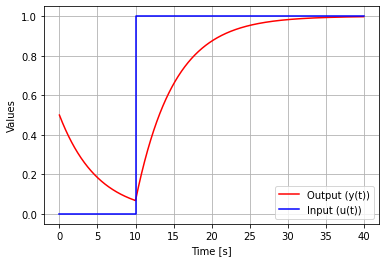

In [23]:
fig, ax = plt.subplots()
ax.plot(t, y, 'r-', label='Output (y(t))')
ax.plot([0, 10, 10, 40], [0, 0, 1, 1], 'b-', label='Input (u(t))')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Values')
ax.grid(True)
ax.legend(loc='best')
plt.show()